In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
import warnings 
import cv2
import os
warnings.filterwarnings('ignore')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1/255,               # Normalize pixel values to [0, 1]
    rotation_range=45,            # Randomly rotate images
    width_shift_range=0.2,        # Randomly shift images horizontally
    height_shift_range=0.2,       # Randomly shift images vertically
    shear_range=0.2,              # Randomly shear images
    zoom_range=0.2,               # Randomly zoom images
    horizontal_flip=True,         # Randomly flip images horizontally
    vertical_flip=True,           # Randomly flip images vertically
    fill_mode='nearest'           # Fill empty pixels after transformations
)

test_datagen = ImageDataGenerator(
    rescale=1/255)

In [8]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\Liam Frank\Downloads\aircraft_image_dataset-20241029T202348Z-001\aircraft_image_dataset\train',
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    shuffle=True,
                                                    class_mode = 'sparse')

test_generator = test_datagen.flow_from_directory(r'C:\Users\Liam Frank\Downloads\aircraft_image_dataset-20241029T202348Z-001\aircraft_image_dataset\test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  shuffle=True,
                                                  class_mode = 'sparse')

Found 6044 images belonging to 11 classes.
Found 825 images belonging to 11 classes.


In [9]:
train_generator.class_indices

{'A-10': 0,
 'B-1': 1,
 'B-2': 2,
 'B-52': 3,
 'BareLand': 4,
 'C-130': 5,
 'C-135': 6,
 'C-17': 7,
 'C-5': 8,
 'E-3': 9,
 'KC-10': 10}

In [10]:
test_generator.class_indices

{'A-10': 0,
 'B-1': 1,
 'B-2': 2,
 'B-52': 3,
 'BareLand': 4,
 'C-130': 5,
 'C-135': 6,
 'C-17': 7,
 'C-5': 8,
 'E-3': 9,
 'KC-10': 10}

In [11]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False  

model2 = models.Sequential()
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(layers.Dense(train_generator.num_classes, activation='softmax'))
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │          11,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,417,099 (154.18 MB)

 Trainable params: 25,702,411 (98.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history2 = model2.fit(train_generator, epochs=50,
                    verbose=1,
                    callbacks=[early_stopping],
                    batch_size=128,
                    validation_data=test_generator)

In [14]:
model2 = tf.keras.models.load_model('MilSat224.keras')

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy', color = '#000000')
plt.plot(history2.history['val_accuracy'], label = 'validation accuracy', color = '#ff6600')
plt.title('Model Accuracy vs Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.xlim([0,25])
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='lower right')

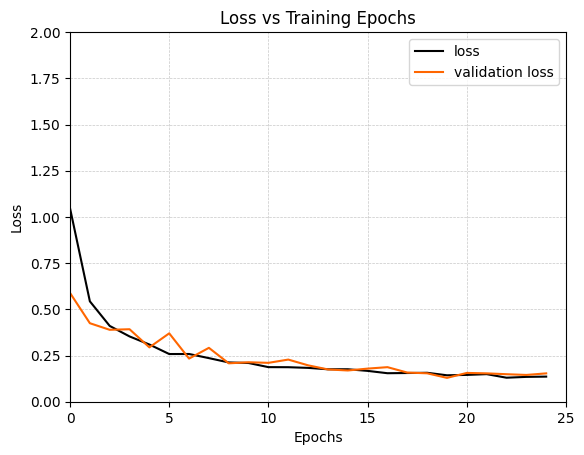

In [26]:
plt.plot(history2.history['loss'], label='loss', color='#000000')
plt.plot(history2.history['val_loss'], label = 'validation loss', color='#ff6600')
plt.title('Loss vs Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,2])
plt.xlim([0,25])
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right')

In [15]:
test_loss, test_acc = model2.evaluate(test_generator, verbose=1)
test_acc = test_acc*100
acc_r = round(test_acc, 2)
print(f"Convolutional Neural Network Accuracy: {acc_r} %")

26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9428 - loss: 0.1686
Convolutional Neural Network Accuracy: 95.64 %


Found 825 images belonging to 11 classes.
26/26 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step


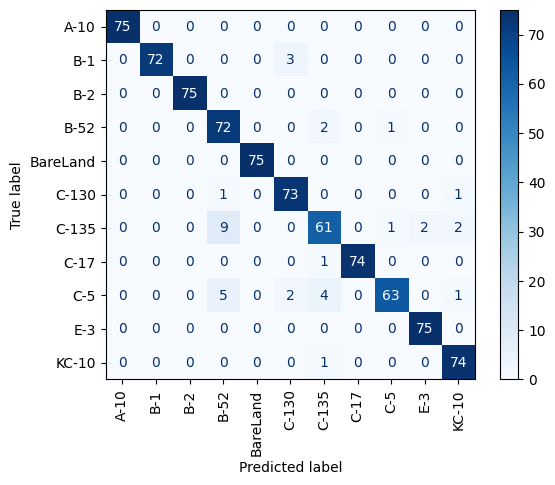

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_generator = test_datagen.flow_from_directory(r'C:\Users\Liam Frank\Downloads\aircraft_image_dataset-20241029T202348Z-001\aircraft_image_dataset\test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  shuffle=False,
                                                  class_mode = 'sparse')
Y_pred = model2.predict(test_generator)
# Convert predictions to label indices 
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get the true labels from the test generator
y_true = test_generator.classes  # Assuming test_generator has the true labels stored here

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually input the data
data = {
    'epoch': list(range(1, 26)),  # Epochs 1 to 25
    'accuracy': [0.5338, 0.8190, 0.8764, 0.8823, 0.8918, 0.9179, 0.9194, 0.9325, 0.9354, 0.9315,
                 0.9400, 0.9420, 0.9463, 0.9440, 0.9513, 0.9498, 0.9508, 0.9489, 0.9504, 0.9544,
                 0.9577, 0.9515, 0.9604, 0.9550, 0.9552],
    'val_accuracy': [0.8242, 0.8691, 0.8739, 0.8630, 0.9176, 0.8812, 0.9297, 0.9067, 0.9309, 0.9236,
                     0.9394, 0.9345, 0.9285, 0.9479, 0.9430, 0.9467, 0.9430, 0.9552, 0.9552, 0.9564,
                     0.9467, 0.9491, 0.9467, 0.9576, 0.9588]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    epoch  accuracy  val_accuracy
0       1    0.5338        0.8242
1       2    0.8190        0.8691
2       3    0.8764        0.8739
3       4    0.8823        0.8630
4       5    0.8918        0.9176
5       6    0.9179        0.8812
6       7    0.9194        0.9297
7       8    0.9325        0.9067
8       9    0.9354        0.9309
9      10    0.9315        0.9236
10     11    0.9400        0.9394
11     12    0.9420        0.9345
12     13    0.9463        0.9285
13     14    0.9440        0.9479
14     15    0.9513        0.9430
15     16    0.9498        0.9467
16     17    0.9508        0.9430
17     18    0.9489        0.9552
18     19    0.9504        0.9552
19     20    0.9544        0.9564
20     21    0.9577        0.9467
21     22    0.9515        0.9491
22     23    0.9604        0.9467
23     24    0.9550        0.9576
24     25    0.9552        0.9588


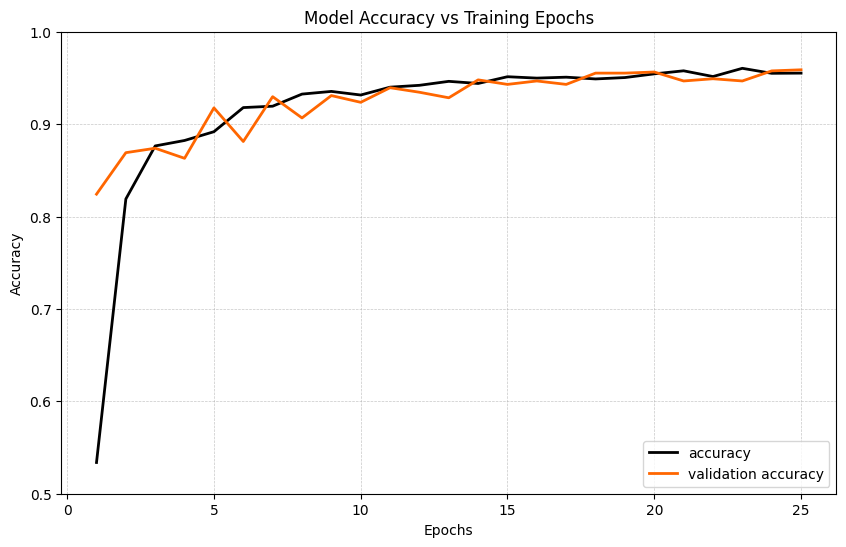

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['accuracy'], label='accuracy', color='black', linewidth=2)
plt.plot(df['epoch'], df['val_accuracy'], label='validation accuracy', color='#ff6600', linewidth=2)

# Customize the plot
plt.title('Model Accuracy vs Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='lower right')

plt.show()
